# TITLE TODO

## Setup imports

In [12]:
from auxiliary.nifti.io import read_nifti
import numpy as np

from panoptica import MatchedInstancePair, NaiveOneToOneMatching, Panoptic_Evaluator


## Load data

In [13]:
ref_masks = read_nifti("./spine_seg/instance_example/ref.nii.gz")

pred_masks = read_nifti("./spine_seg/instance_example/pred.nii.gz")

## Visualize data

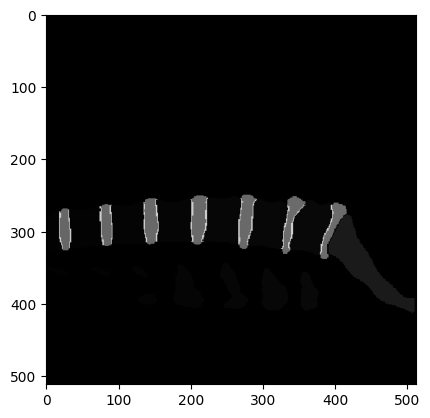

In [14]:
import matplotlib.pyplot as plt

plt.imshow(ref_masks[:,:,8], cmap="gray", vmin=0, vmax=255)


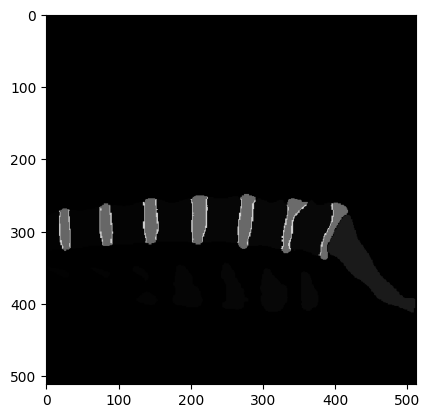

In [15]:
plt.imshow(pred_masks[:,:,8], cmap="gray", vmin=0, vmax=255)


## Run eval

In [17]:


sample = MatchedInstancePair(prediction_arr=pred_masks, reference_arr=ref_masks)

evaluator = Panoptic_Evaluator(
    expected_input=MatchedInstancePair,
    instance_approximator=None,
    instance_matcher=NaiveOneToOneMatching(),
    iou_threshold=0.5,
)

result, debug_data = evaluator.evaluate(sample)
print(result)

evaluate took 0.12151193618774414 seconds to execute.
Number of instances in prediction: 22
Number of instances in reference: 22
True Positives (tp): 19
False Positives (fp): 3
False Negatives (fn): 3
Recognition Quality / F1 Score (RQ): 0.8636363636363636
Segmentation Quality (SQ): 0.8328184295330797 ± 0.1518606400451747
Panoptic Quality (PQ): 0.7192522800512962
volumetric instance-wise DICE: 0.900292616009954 ± 0.10253566174957332
{}
